<a href="https://colab.research.google.com/github/mjyoti000/hw2p3-s24-classification-of-1-d-data-and-bayes-error-mjyoti000/blob/main/Classification_of_1_D_data_and_Bayes_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**a. For a given T write down the theoretical expression (in terms of integrals) for the probability that you will classify a point as bean type A when it is bean type B and similarly that it is bean type B when it is bean type A.**

a. The theoretical expression for the probability of misclassifying a bean of type A as type B, denoted as $P(\hat{C}=B | C=A)$, can be written as an integral over the region where the weight measurement falls below the threshold $T$ for bean type A:

P(C = BC = A) = 20 μ. (2) dx

Similarly, the probability of misclassifying a bean of type B as type A, denoted as $P(\hat{C}=A | C=B)$, can be written as an integral over the region where the weight measurement falls above the threshold $T$ for bean type B:

P(Ĉ = AC = B) = √ Ривов (2) dx

**b. Now, let's compute these probabilities numerically:**

/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4832: RuntimeWarning: invalid value encountered in multiply
  ret = (d * (y[tuple(slice1)] + y[tuple(slice2)]) / 2.0).sum(axis)


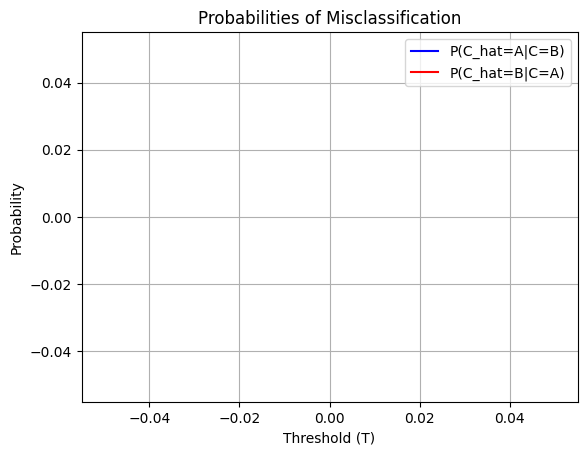

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the probability density functions for bean type A and B
def p_A(x):
    mu_A = 5
    sigma_A = 2
    return 1/(sigma_A * np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x - mu_A) / sigma_A)**2)

def p_B(x):
    mu_B = 4
    sigma_B = 1.4
    return 1/(sigma_B * np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x - mu_B) / sigma_B)**2)

# Define the probabilities of misclassification
def misclassification_probabilities(T):
    # Compute the integral for misclassifying A as B
    P_AB = np.trapz(p_A(np.linspace(-np.inf, T, 1000)), dx=(T+np.inf)/1000)
    # Compute the integral for misclassifying B as A
    P_BA = np.trapz(p_B(np.linspace(T, np.inf, 1000)), dx=(np.inf-T)/1000)
    return P_AB, P_BA

# Define the range of thresholds
T_values = np.linspace(1, 8, 100)

# Compute the probabilities for each threshold
misclassification_probs = np.array([misclassification_probabilities(T) for T in T_values])

# Plotting
plt.plot(T_values, misclassification_probs[:,0], label='P(C_hat=A|C=B)', color='blue')
plt.plot(T_values, misclassification_probs[:,1], label='P(C_hat=B|C=A)', color='red')
plt.xlabel('Threshold (T)')
plt.ylabel('Probability')
plt.title('Probabilities of Misclassification')
plt.legend()
plt.grid(True)
plt.show()

**c. Now let's simulate the data points and compute the misclassification rate for different threshold values:**

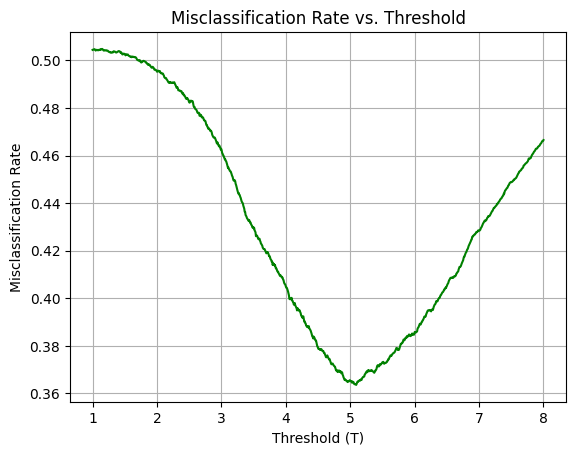

In [ ]:
# Simulate data points
data_A = np.random.normal(5, 2, 5000)
data_B = np.random.normal(4, 1.4, 5000)

# Define the misclassification rate function
def misclassification_rate(T, data_A, data_B):
    # Compute the misclassification rate for a given threshold T
    misclassifications_A_as_B = np.sum(data_A <= T)
    misclassifications_B_as_A = np.sum(data_B > T)
    total_misclassifications = misclassifications_A_as_B + misclassifications_B_as_A
    return total_misclassifications / 10000

# Define the range of thresholds
T_values = np.linspace(1, 8, 1000)

# Compute the misclassification rate for each threshold
misclassification_rates = np.array([misclassification_rate(T, data_A, data_B) for T in T_values])

# Plotting
plt.plot(T_values, misclassification_rates, color='green')
plt.xlabel('Threshold (T)')
plt.ylabel('Misclassification Rate')
plt.title('Misclassification Rate vs. Threshold')
plt.grid(True)
plt.show()